# **迴歸12個變數之熱力圖與相關係數**

In [103]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [115]:
df = pd.read_excel('corr.xlsx')
df = df.drop('_TYPE_' , axis=1)
df = df.set_index('Variable_name')
df

,Age,sex,Sleep_efficiency,Sleep_duration,REM_sleep_percentage,Light_sleep_percentage,Deep_sleep_percentage,Caffeine_consumption,Awakenings,Alcohol_consumption,Exercise_frequency,smoke
Variable_name,,,,,,,,,,,,
Age,1.000000,0.244468,0.098357,-0.062462,0.042091,-0.031905,0.021730,-0.164964,-0.016677,0.052238,0.069487,0.031237
sex,0.244468,1.000000,0.010062,-0.044376,-0.161102,-0.040534,0.075939,-0.284440,0.074029,0.051557,0.241667,0.143020
Sleep_efficiency,0.098357,0.010062,1.000000,-0.027467,0.062362,-0.819204,0.787335,0.052515,-0.552179,-0.381249,0.251984,-0.290026
Sleep_duration,-0.062462,-0.044376,-0.027467,1.000000,-0.015940,0.041804,-0.037304,-0.014429,-0.000962,-0.044325,-0.068416,0.004211
REM_sleep_percentage,0.042091,-0.161102,0.062362,-0.015940,1.000000,-0.017462,-0.208159,0.086913,-0.026594,-0.047344,0.012857,0.032184
Light_sleep_percentage,-0.031905,-0.040534,-0.819204,0.041804,-0.017462,1.000000,-0.974311,-0.007452,0.307243,0.374742,-0.187027,0.224436
Deep_sleep_percentage,0.021730,0.075939,0.787335,-0.037304,-0.208159,-0.974311,1.000000,-0.012287,-0.294568,-0.355925,0.180063,-0.226802
Caffeine_consumption,-0.164964,-0.284440,0.052515,-0.014429,0.086913,-0.007452,-0.012287,1.000000,-0.096557,-0.112744,-0.071980,-0.013674
Awakenings,-0.016677,0.074029,-0.552179,-0.000962,-0.026594,0.307243,-0.294568,-0.096557,1.000000,0.189213,-0.212003,-0.018849


In [116]:
print(df.dtypes)

Age                       float64
sex                       float64
Sleep_efficiency          float64
Sleep_duration            float64
REM_sleep_percentage      float64
Light_sleep_percentage    float64
Deep_sleep_percentage     float64
Caffeine_consumption      float64
Awakenings                float64
Alcohol_consumption       float64
Exercise_frequency        float64
smoke                     float64
dtype: object


In [106]:
df["Age"] = pd.to_numeric(df["Age"])
print(df["Age"].dtypes)

float64


In [107]:
#使用Mask矩陣來生成Seaborn中的熱力圖，那麼我們首先來生成Mask矩陣
np.ones_like(df, dtype=np.bool)

<ipython-input-107-17435401d099>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones_like(df, dtype=np.bool)


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True

In [108]:
#得到上三角矩陣，在Numpy中使用np.triu函數可以返回上三角矩陣對應的Mask
mask = np.triu(np.ones_like(df, dtype=np.bool))
mask

<ipython-input-108-f6a400890dd4>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df, dtype=np.bool))


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True

In [114]:
from matplotlib.font_manager import fontManager
for i in sorted(fontManager.get_font_names()): print(i)

DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Humor Sans
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif
STIXGeneral
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeTwoSym
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10


<ipython-input-117-3afca179ce30>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df, dtype=np.bool))


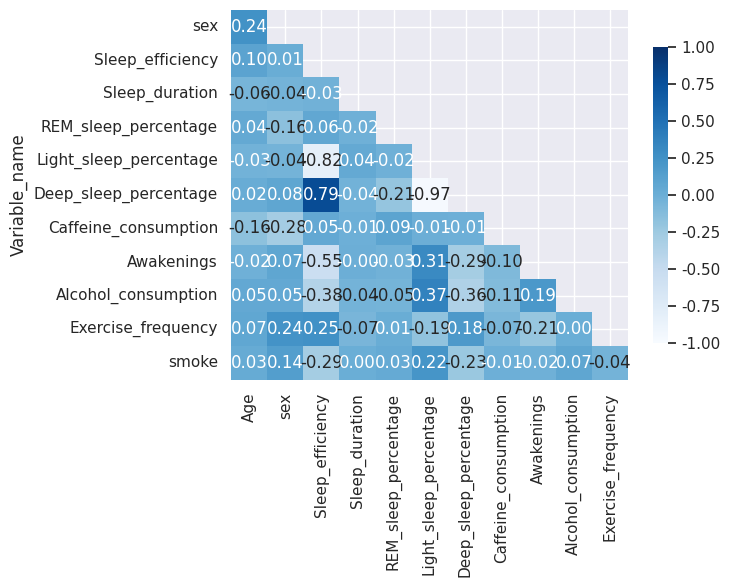

In [117]:
mask = np.triu(np.ones_like(df, dtype=np.bool))

# adjust mask and df(刪除左上右下的兩個空格)
mask = mask[1:, :-1]
df = df.iloc[1:, :-1].copy()
# plot heatmap
sns.heatmap(df, mask=mask, annot=True, fmt=".2f", cmap='Blues',
      vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show();

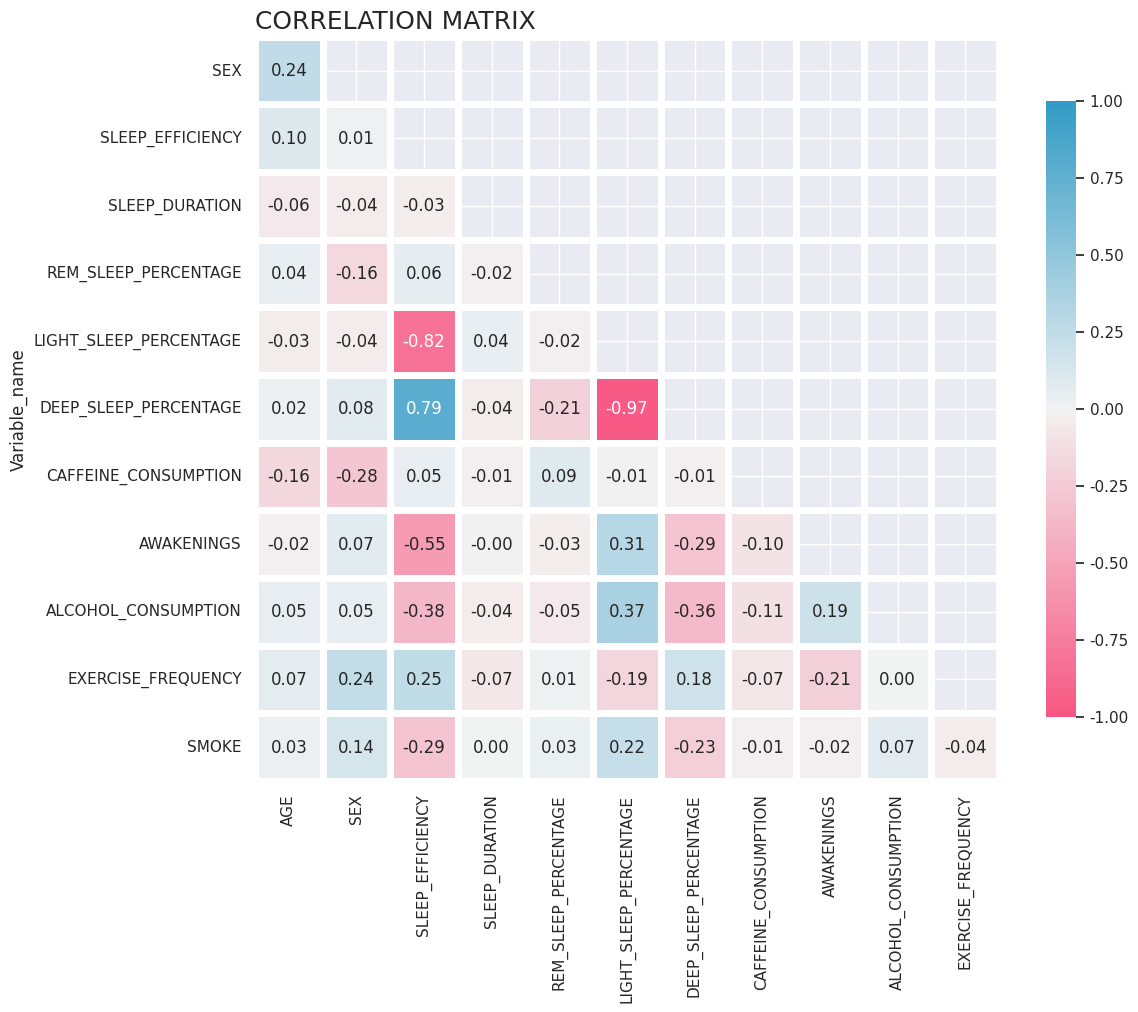

In [118]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
#mask = np.triu(np.ones_like(df, dtype=np.bool))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(df, mask=mask, annot=True, fmt=".2f",
               linewidths=5, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in df.index]
xticks = [i.upper() for i in df.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
plt.show()